# Products Clustering

Através da coluna **Description** será criado um _Bag of Words_ sobre todos os tipos de produtos presentes no dataset

Importando blibliotecas

In [274]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Lendo _dataset_

In [275]:
df = pd.read_csv('data/final_online_retail.csv')

Mostrando os cabeçalhos e os 5 primeiros registros

In [276]:
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderCanceled
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0


In [277]:
products = df['Description']

In [278]:
products = products.str.replace(r'[^a-zA-Z ]', '')

In [279]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')

In [284]:
def stem_product(product):
    words = nltk.word_tokenize(product)
    separated_words = []
    for w in words:
        separated_words.append(stemmer.stem(w))
    return ' '.join(separated_words)

In [285]:
stem_products = products.apply(lambda p: stem_product(p))

In [286]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

count_vectorizer = CountVectorizer(analyzer='word', tokenizer=nltk.word_tokenize, preprocessor=None, stop_words='english', max_features=None)

In [287]:
bag_of_words = count_vectorizer.fit_transform(stem_products)
bag_of_words

<401604x1774 sparse matrix of type '<class 'numpy.int64'>'
	with 1591961 stored elements in Compressed Sparse Row format>

In [288]:
count_vectorizer.get_feature_names()[85:95]

['baubl',
 'bazaar',
 'bdraw',
 'bea',
 'beach',
 'bead',
 'beak',
 'beaker',
 'bear',
 'beaten']

In [289]:
print('Foram geradas', len(count_vectorizer.get_feature_names()), 'palavras da coluna Description')

Foram geradas 1774 palavras da coluna Description


In [290]:
words_occurrence = sorted(zip(bag_of_words.toarray().sum(axis=0), count_vectorizer.get_feature_names()), reverse=True)

In [291]:
words_occurrence[:10]

[(48091, 'set'),
 (38347, 'bag'),
 (33402, 'heart'),
 (32597, 'red'),
 (26754, 'retrospot'),
 (25761, 'vintag'),
 (24151, 'design'),
 (21037, 'box'),
 (20551, 'pink'),
 (19082, 'christma')]

In [292]:
word_count = pd.DataFrame(z, columns=['count', 'word'])
word_count.head()

,count,word
0,48091,set
1,38347,bag
2,33402,heart
3,32597,red
4,26754,retrospot


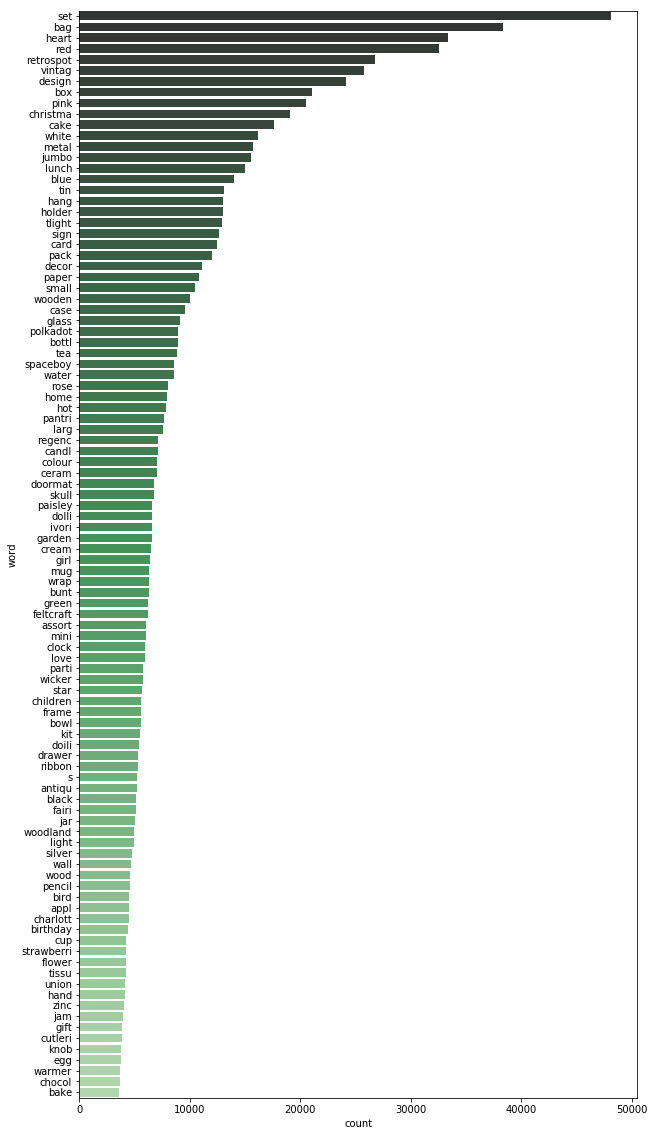

In [298]:
plt.figure(figsize=(10, 20))
sns.barplot(y='word', x='count', data=word_count[:100], palette='Greens_d')

In [299]:
from sklearn.cluster import KMeans

In [ ]:
# for n_clusters in range(1, 15):
#     kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=10)
#     kmeans.fit(bag_of_words)
#     clusters = kmeans.predict(bag_of_words)
#     print("For n_clusters =", n_clusters, 'com inércia ', kmeans.inertia_)

In [300]:
# inertias = []

# interval = range(1, 10)
# for i in interval:
#     kmeans = KMeans(init='k-means++', n_clusters = i, n_init=10)
#     kmeans.fit(bag_of_words)
#     inertias.append(kmeans.inertia_)

# plt.plot(interval, inertias, '-o')
# plt.xlabel('Número de Clusters')
# plt.ylabel('Inércia')
# plt.show()

In [301]:
kmeans = KMeans(init='k-means++', n_clusters=5)
kmeans.fit(bag_of_words)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [306]:
clusters = kmeans.predict(bag_of_words)

In [316]:
for index, cluster in enumerate(list(pd.Series(clusters).value_counts())):
    print('Cluster', index, ':', cluster, 'produtos')

Cluster 0 : 270565 produtos
Cluster 1 : 46583 produtos
Cluster 2 : 35128 produtos
Cluster 3 : 31314 produtos
Cluster 4 : 18014 produtos
